A partir del archivo food_100, se pide:

1. Limpiar el archivo borrando las columnas Unnamed.
2. ¿Qué porcentaje de valores NaN hay en cada columna?
3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?

In [29]:
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_apr_2021/main/week10_ML_competition_pca_kmeans/day1_gridsearch_pipelines/data/food_100.csv")
df

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,34715,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055715,2017-03-09T10:35:15Z,1489055715,2017-03-09T10:35:15Z,Organic Pecan Halves,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,34784,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138485,2017-03-10T09:34:45Z,1489138485,2017-03-10T09:34:45Z,Unsalted Dry Roasted Almonds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,34791,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055720,2017-03-09T10:35:20Z,1489055720,2017-03-09T10:35:20Z,Organic Raw Pumpkin Seeds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
98,98,35071,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138484,2017-03-10T09:34:44Z,1489138484,2017-03-10T09:34:44Z,Organic Extra Virgin Olive Oil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1. Limpiar el archivo borrando las columnas Unnamed.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 164 entries, Unnamed: 0 to water-hardness_100g
dtypes: float64(125), int64(4), object(35)
memory usage: 128.2+ KB


In [4]:
lista_columnas = df.columns.tolist()

In [5]:
for columna in lista_columnas:
    lista = re.findall("Unnamed.*", columna)
    if lista:
        print(f"Columnas Unnamed : {lista[0]}")
        try:
            df.drop(lista[0], 1, inplace = True)
        except:
            print(f"La columna {lista[0]} ya ha sido eliminada")

Columnas Unnamed : Unnamed: 0


**2. ¿Qué porcentaje de valores NaN hay en cada columna?**

In [6]:
percen_null = df.isna().mean().round(4) * 100
percen_null[percen_null == 0]

code                      0.0
url                       0.0
creator                   0.0
created_t                 0.0
created_datetime          0.0
last_modified_t           0.0
last_modified_datetime    0.0
countries                 0.0
countries_tags            0.0
countries_en              0.0
states                    0.0
states_tags               0.0
states_en                 0.0
dtype: float64

In [7]:
percen_null[(percen_null > 0) & (percen_null <=20)]

product_name                                1.0
brands                                      4.0
brands_tags                                 4.0
ingredients_text                            5.0
serving_size                                6.0
additives_n                                 5.0
additives                                   5.0
ingredients_from_palm_oil_n                 5.0
ingredients_that_may_be_from_palm_oil_n     5.0
energy_100g                                 8.0
fat_100g                                   20.0
carbohydrates_100g                         10.0
fiber_100g                                 14.0
proteins_100g                              12.0
iron_100g                                  19.0
dtype: float64

In [8]:
percen_null[(percen_null > 20) & (percen_null <= 95)]

quantity                   95.0
additives_tags             84.0
additives_en               84.0
nutrition_grade_fr         63.0
saturated-fat_100g         42.0
cholesterol_100g           94.0
sugars_100g                36.0
salt_100g                  41.0
sodium_100g                41.0
vitamin-a_100g             83.0
vitamin-c_100g             80.0
calcium_100g               35.0
nutrition-score-fr_100g    63.0
nutrition-score-uk_100g    63.0
dtype: float64

In [9]:
percen_null[(percen_null > 95) & (percen_null < 100)]

packaging                                     99.0
packaging_tags                                99.0
categories                                    99.0
categories_tags                               99.0
categories_en                                 99.0
traces                                        99.0
traces_tags                                   99.0
traces_en                                     99.0
ingredients_that_may_be_from_palm_oil_tags    99.0
pnns_groups_1                                 99.0
pnns_groups_2                                 99.0
main_category                                 99.0
main_category_en                              99.0
image_url                                     98.0
image_small_url                               98.0
trans-fat_100g                                96.0
dtype: float64

In [10]:
percen_null[(percen_null == 100)]

generic_name                 100.0
origins                      100.0
origins_tags                 100.0
manufacturing_places         100.0
manufacturing_places_tags    100.0
                             ...  
cocoa_100g                   100.0
chlorophyl_100g              100.0
carbon-footprint_100g        100.0
glycemic-index_100g          100.0
water-hardness_100g          100.0
Length: 105, dtype: float64

**3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?**

In [24]:
null_numeric = df._get_numeric_data().isna().mean().round(4) * 100
null_numeric.sort_values(ascending=True)[:5]

code                                       0.0
created_t                                  0.0
last_modified_t                            0.0
ingredients_that_may_be_from_palm_oil_n    5.0
ingredients_from_palm_oil_n                5.0
dtype: float64

In [25]:
df._get_numeric_data().isna().sum().sort_values(ascending=True)[:5]

code                                       0
created_t                                  0
last_modified_t                            0
ingredients_that_may_be_from_palm_oil_n    5
ingredients_from_palm_oil_n                5
dtype: int64

In [26]:
null_numeric.sort_values(ascending=True)[:5].index

Index(['code', 'created_t', 'last_modified_t',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n'],
      dtype='object')

In [27]:
cor_mat = df[null_numeric.sort_values(ascending=True)[:5].index.to_list() + ["product_name"]].corr()

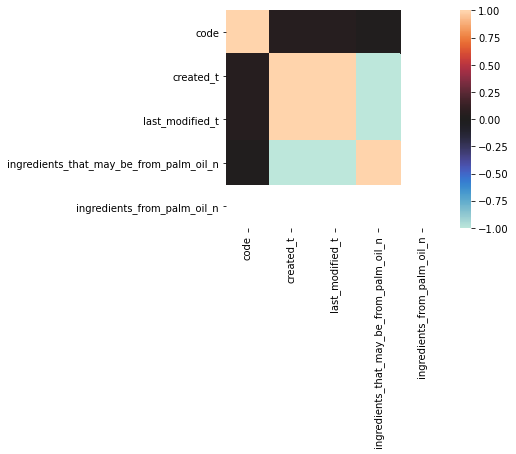

In [31]:
ax = sns.heatmap(
    cor_mat, 
    vmin=-1, vmax=1, center=0,
    square=True,
)